# 期中專案: 百貨業實習生日誌情緒分析
**Author:** 周紘樟、鍾君右、林妤姍、陳亞琦<br>
**Date created:** 2021/11/26<br>
**Last modified:** 2021/11/26<br>
希望可以透過實習生日誌的內容，分析他們的情緒變化，與實習狀態。

## 大綱
+ 1. 資料前處理
    + 1.1 基本資料介紹
    + 1.2 資料清理
    + 1.3 文章斷詞
+ 2. lexicon-base 情緒分析
    + 2.1 準備台大情緒字典
    + 2.2 情緒字典與斷詞結果進行合併
    + 2.3 實習生各自的情緒分析
    + 2.4 依照月份的整體情緒走向
    + 2.5 文字雲
    + 2.6 情緒代表字
    + 2.7 歸類正負面文章
    + 2.8 情緒關鍵字
+ 3. 結論    

In [ ]:
# 安裝會使用到的套件
# %pip install wordcloud

In [1]:
# 確認當前工作目錄
%pwd

'c:\\Users\\betty\\D\\資管所\\社群媒體分析\\期中專案'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import re
import jieba
import jieba.analyse
from datetime import datetime
from wordcloud import WordCloud 

In [3]:
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

## 1. 資料前處理
處理實習生日誌的execel檔案，包含日期處理，加上員工編號。

### 1.1 基本資料介紹
- 資料來源: 的實習生日誌
- 資料集： `raw_data/Meta-1.csv`、`raw_data/Meta-2.csv`
- 資料時間：

主要分析實習生的情緒變化。本次主要針對以下方向分析：
1. 各個實習生在實習過程鍾的情緒變化？
2. 每個月實習生們的總體情緒走向?
3. 正面和負面時間點上的差異？
4. 正面和負面討論的情緒分數大約多少？

In [ ]:
#匯入資料
MetaData1 = pd.read_csv('./raw_data/Meta-1.csv', encoding='UTF-8')
# MetaData2 = pd.read_csv('./raw_data/Meta-2.csv', encoding='UTF-8')

In [ ]:
# 合併MetaData1和MetaData2為MetaData


In [4]:
print(f"共有 {MetaData.shape[0]} 篇文章") #(row,column)
MetaData.head(3)

NameError: name 'MetaData' is not defined

In [ ]:
MetaData = MetaData.loc[MetaData['sentence'].str.contains(toMatch) | MetaData['artTitle'].str.contains(toMatch), :]
MetaData.reset_index(inplace=True, drop=True) #重設index
print(MetaData.shape)

(1495, 10)


### 1.2 資料清理  
- 去除NA值
- 去除不是中文的字詞

In [ ]:
# 移除內容為na值的資料
MetaData.dropna(subset = ["內容"], inplace=True)

In [ ]:
MetaData['內容'] = MetaData.內容.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))

In [ ]:
MetaData.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]爭鮮除了鮭魚是不是沒東西吃了,2021/3/10,10:40:11,https://www.ptt.cc/bbs/Gossiping/M.1615372814....,aynmeow,Gossiping,20,8,2,安安阿肥我在爭鮮啦吃了盤快飽其中盤是鮭魚沒錯除了鮭魚其他都難吃不懂那些拿鮪魚拿手捲的人在想什...
1,[問卦]鮭魚煮熟為啥跟垃圾一樣？,2021/3/12,09:48:04,https://www.ptt.cc/bbs/Gossiping/M.1615542487....,frzqp3814396,Gossiping,37,8,10,鮭魚生魚片超好吃完全不雷但鮭魚不管煮湯還是用煎的怎麼吃起來就普普通通尤其魚腥味很難去除有沒有八卦
2,[問卦]雞蛋是素的為什麼魚卵是葷的???,2021/3/12,16:48:43,https://www.ptt.cc/bbs/Gossiping/M.1615567725....,eddisontw,Gossiping,11,3,1,很多人吃雞蛋都說雞蛋是素的因為沒有受精魚卵未產卵前也沒有受精阿像是鮭魚卵魚子醬明太子可是吃素...


### 1.3 文章斷詞
中文文集我們使用`jieba`套件進行斷詞與移除停用字

In [ ]:
#設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
#新增自定義字典
jieba.load_userdict('./dict/user_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\Users\betty\D\資管所\社群媒體分析\week4_sentiment_analysis1\dict\dict.txt.big ...
Dumping model to file cache C:\Users\betty\AppData\Local\Temp\jieba.u5b454b0d9d9e0a9ec038e8c618e82523.cache
Loading model cost 1.186 seconds.
Prefix dict has been built successfully.


In [ ]:
def getToken(row):
    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [ ]:
MetaData['word'] = MetaData.內容.apply(getToken)

In [ ]:
# 將word欄位展開
MetaData_token = MetaData.explode('word') 

In [ ]:
MetaData_token.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word
0,[問卦]爭鮮除了鮭魚是不是沒東西吃了,2021/3/10,10:40:11,https://www.ptt.cc/bbs/Gossiping/M.1615372814....,aynmeow,Gossiping,20,8,2,安安阿肥我在爭鮮啦吃了盤快飽其中盤是鮭魚沒錯除了鮭魚其他都難吃不懂那些拿鮪魚拿手捲的人在想什...,安安
0,[問卦]爭鮮除了鮭魚是不是沒東西吃了,2021/3/10,10:40:11,https://www.ptt.cc/bbs/Gossiping/M.1615372814....,aynmeow,Gossiping,20,8,2,安安阿肥我在爭鮮啦吃了盤快飽其中盤是鮭魚沒錯除了鮭魚其他都難吃不懂那些拿鮪魚拿手捲的人在想什...,阿肥
0,[問卦]爭鮮除了鮭魚是不是沒東西吃了,2021/3/10,10:40:11,https://www.ptt.cc/bbs/Gossiping/M.1615372814....,aynmeow,Gossiping,20,8,2,安安阿肥我在爭鮮啦吃了盤快飽其中盤是鮭魚沒錯除了鮭魚其他都難吃不懂那些拿鮪魚拿手捲的人在想什...,爭鮮


In [ ]:
#轉換日期格式
data['artDate'] = pd.to_datetime(data['artDate'], format="%Y/%m/%d")

In [ ]:
#計算每天不同字的詞頻
word_count = data.groupby(['artDate','word'],as_index=False).size()
word_count.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_count = word_count[word_count['size']>3]  #過濾出現太少次的字
word_count.head(10)

,artDate,word,size
46741,2021-03-19,鮭魚,1935
16648,2021-03-17,鮭魚,1928
9939,2021-03-17,改名,1590
37105,2021-03-19,改名,1577
28635,2021-03-18,鮭魚,1353
22395,2021-03-18,改名,1114
32392,2021-03-19,台灣,983
40923,2021-03-19,真的,910
55132,2021-03-20,鮭魚,620
5488,2021-03-17,免費,602


## 2. lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

### 2.1 準備台大字典  
- 分為正向情緒與負向情緒

In [ ]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"./dict/liwc/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])

In [ ]:
df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)
df_liwc

,word,sentiments
0,一無所有,negative
1,七竅生煙,negative
2,上當,negative
3,下流,negative
4,下等,negative
...,...,...
1706,魅力,positive
1707,鮮明,positive
1708,鮮美,positive
1709,鼓勵,positive


### 2.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。

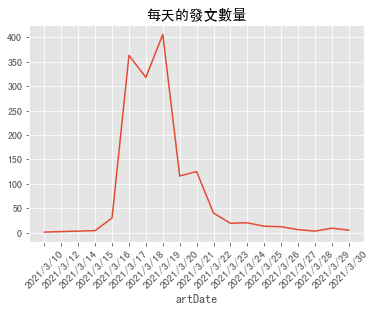

In [ ]:
data_datecount = pd.DataFrame(MetaData.groupby('artDate').size(),columns = ['count'])

plt.figure(figsize=(6,4))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.title('每天的發文數量')
plt.xlabel('artDate')
plt.xticks(rotation= 45, fontsize=11)
plt.plot(data_datecount.index,data_datecount['count'].tolist())

### 2.3 正負向情緒分數聲量折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

In [5]:
#文章和與台大情緒字典做合併
data_liwc = pd.merge(data, df_liwc, on=['word'],how='left')

#算出每天情緒總和(sentiment_count)
sentiment_count = data_liwc.groupby(['artDate','sentiments'],as_index=False).size()
sentiment_count.head()

NameError: name 'data' is not defined

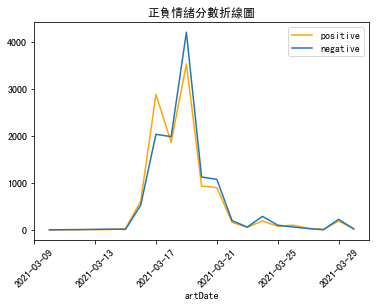

In [ ]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # 顯示圖框架大小 (寬,高)
plt.style.use("default")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒分數折線圖')
plt.plot(p['artDate'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['artDate'].tolist(), n['size'], label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #顯示圖例
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('artDate')
plt.show()

畫出每天的情緒總分數

### 2.4 正負向情緒分數比例折線圖圖

In [ ]:
sentiment_count_r = sentiment_count.assign(ratio = sentiment_count.groupby(['artDate'], as_index=False)
                                           .apply(lambda x: x['size'] / sum(x['size'])).reset_index(level=0, drop=True))

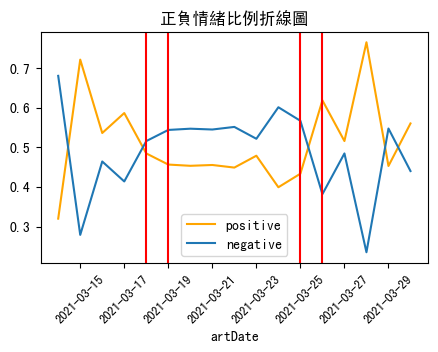

In [ ]:
sentiment_count_r = sentiment_count_r[sentiment_count_r['artDate'] > '2021/03/13']
p = sentiment_count_r[sentiment_count_r['sentiments']=='positive']
n = sentiment_count_r[sentiment_count_r['sentiments']=='negative']

plt.figure(figsize=(5,3))   # 顯示圖框架大小 (寬,高)
plt.style.use("default")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒比例折線圖')
plt.plot(p['artDate'].tolist(), p['ratio'], label='positive',color="orange")
plt.plot(n['artDate'].tolist(), n['ratio'], label='negative')
plt.xticks(rotation= 45, fontsize=9)
plt.legend() #顯示圖例
plt.axvline(x=datetime.strptime('2021-03-18', "%Y-%m-%d"), color="red", ls="-")
plt.axvline(x=datetime.strptime('2021-03-19', "%Y-%m-%d"), color="red", ls="-")
plt.axvline(x=datetime.strptime('2021-03-25', "%Y-%m-%d"), color="red", ls="-")
plt.axvline(x=datetime.strptime('2021-03-26', "%Y-%m-%d"), color="red", ls="-")
plt.xlabel('artDate')
plt.show()

透過上圖我們可以發現3/18到3/19是一次情緒由正轉負的轉折，而3/25到3/26是一次情緒由負轉正的轉折

### 2.5 文字雲
針對不同月分畫出該月的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

In [ ]:
def Wc_dict(df, Date, countB, countS):
    wc_df = (df.query('artDate == @Date') # 篩選日期
             .query('size < @countB')# 篩選最大數量
             .query('size > @countS')# 篩選最小數量
             .sort_values('size', ascending=False))
    wc_dict = dict(zip(wc_df['word'], wc_df['size'])) #建立成dictionary
    
    return wc_dict
    

### 月文字雲


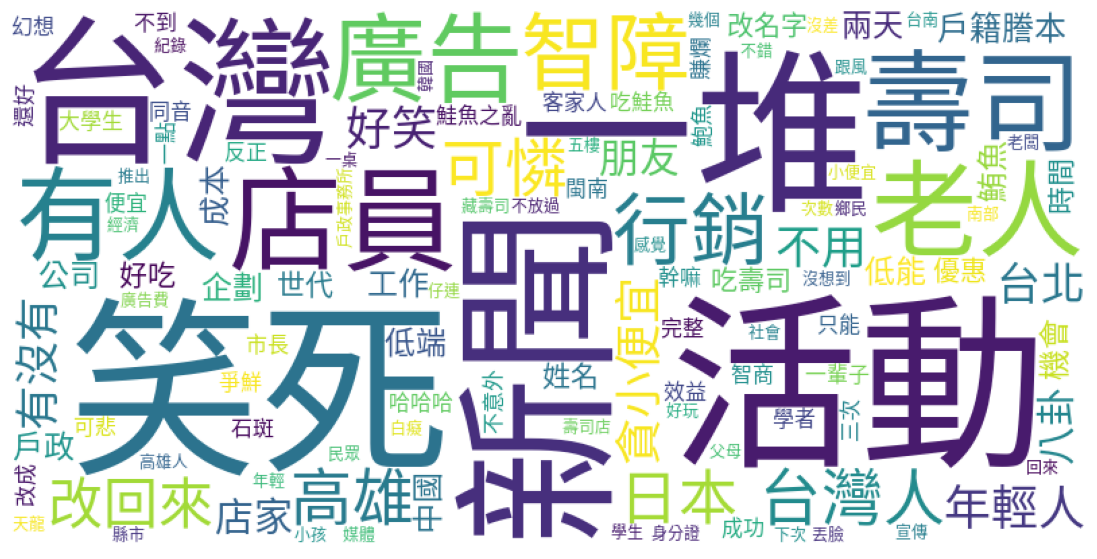

In [ ]:
dict_0317 = Wc_dict(word_count,"2021-03-17",450,50)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_0317)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

### 2.6 情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

In [ ]:
sentiment_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))
sentiment_sum = sentiment_sum.sort_values(by=['size'], ascending=False)  #排序
sentiment_sum.head()

,word,sentiments,size
43,免費,positive,1851
254,笑死,positive,1399
187,智障,negative,818
73,可憐,negative,789
12,丟臉,negative,600


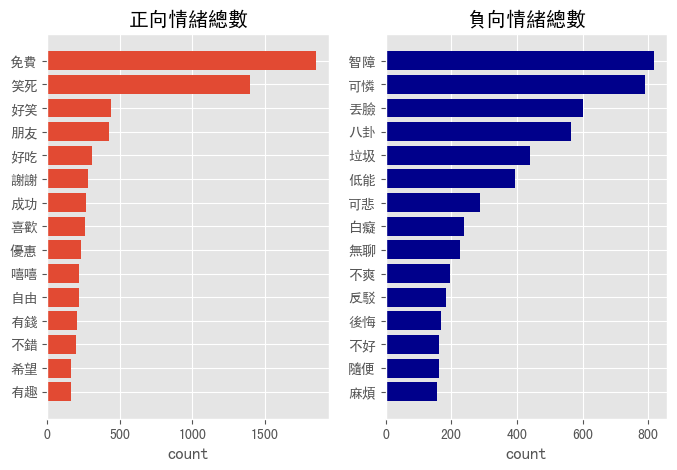

In [ ]:
p_sum = sentiment_sum[sentiment_sum["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum[sentiment_sum["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

另外，也可以依據不同月分觀察情緒代表字的變化

In [ ]:
sentiment_date_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['artDate', 'word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))

#篩選日期
sentiment_0317 = sentiment_date_sum[sentiment_date_sum['artDate']=="2021-03-17"].sort_values(by=['size'], ascending=False)
sentiment_0317.head()

,artDate,word,sentiments,size
81,2021-03-17,免費,positive,602
188,2021-03-17,笑死,positive,409
152,2021-03-17,智障,negative,204
91,2021-03-17,可憐,negative,197
111,2021-03-17,好笑,positive,146


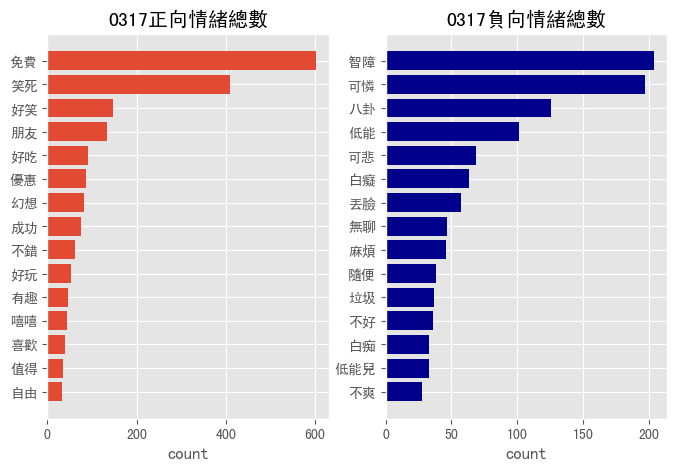

In [ ]:
p_sum = sentiment_0317[sentiment_0317["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0317[sentiment_0317["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('0317正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('0317負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

### 月正負情緒代表字

In [6]:
#篩選月份
sentiment_0319 = sentiment_date_sum[sentiment_date_sum['artDate']=="2021-03-19"].sort_values(by=['size'], ascending=False)
sentiment_0319.head()

NameError: name 'sentiment_date_sum' is not defined

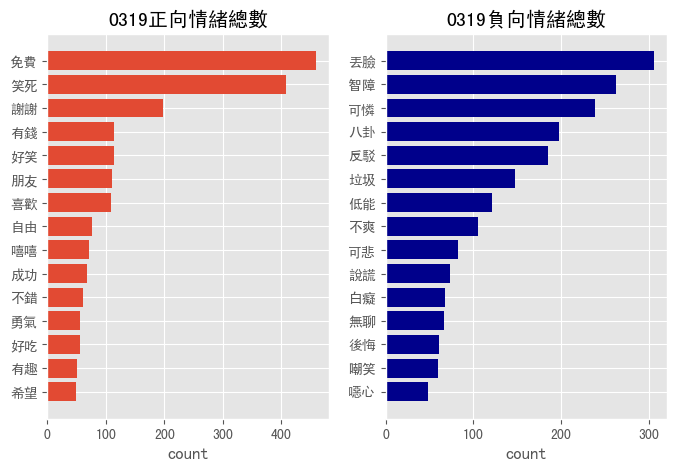

In [ ]:
p_sum = sentiment_0319[sentiment_0319["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_0319[sentiment_0319["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('0319正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('0319負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

比較3/17和3/19的正負情緒代表字，可以發現在負面情緒的部分差異不大。  
在正面情緒部分3/17可以看到比較多「好笑」、「優惠」、「好吃」等詞，可以看出當時網友主要還是在討論優惠活動很有趣。  
而3/19有較多「謝謝」、「有錢」、「自由」等詞，主要是網友對於改名自由的討論和部分網友對改名的調侃。


### 2.7 歸類正負面文章
- 之前的情緒分析大部分是全部的詞彙加總，接下來將正負面情緒的文章分開，看看能不能發現一些新的東西。  
- 接下來歸類文章，將每一篇文章正負面情緒的分數算出來，然後大概分類文章屬於正面還是負面。

In [ ]:
article_type = (data.merge(df_liwc, on='word')
                .groupby(['artUrl', 'sentiments'], as_index=False)
                .size()
                .pivot_table(index='artUrl', columns='sentiments', values='size', fill_value=0)
                .reset_index(['artUrl'])
               )
article_type.head()

sentiments,artUrl,negative,positive
0,https://www.ptt.cc/bbs/Gossiping/M.1615372814....,3,1
1,https://www.ptt.cc/bbs/Gossiping/M.1615542487....,5,6
2,https://www.ptt.cc/bbs/Gossiping/M.1615567725....,3,0
3,https://www.ptt.cc/bbs/Gossiping/M.1615691783....,0,1
4,https://www.ptt.cc/bbs/Gossiping/M.1615696977....,1,1


In [ ]:
article_type['type'] = article_type.apply(lambda x: 'positive' if x['positive'] > x['negative'] else 'negative',axis=1)
article_type.groupby('type', as_index=False).size()

,type,size
0,negative,725
1,positive,693


### 正負情緒文章數量統計圖

In [ ]:
article_type_date = article_type.merge(MetaData.loc[:,["artUrl", "artDate"]], how = 'left', on = 'artUrl')
article_type_date = article_type_date.groupby(['artDate','type'], as_index=False).size()
#article_type_date

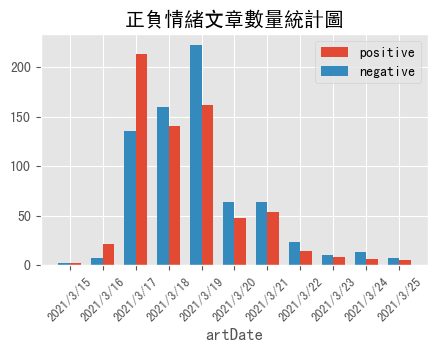

In [ ]:
ap = article_type_date[(article_type_date["type"]=="positive")&(article_type_date["artDate"]>="2021/3/15")&(article_type_date["artDate"]<="2021/3/25")]
an = article_type_date[(article_type_date["type"]=="negative")&(article_type_date["artDate"]>="2021/3/15")&(article_type_date["artDate"]<="2021/3/25")]

plt.figure(figsize=(5,3))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒文章數量統計圖')
plt.xlabel('artDate')
plt.bar(ap['artDate'],ap['size'],align="edge",width=0.35,label="positive")
plt.bar(an['artDate'],an['size'],align="edge",width=-0.35,label="negative")
plt.legend()
plt.xticks(rotation= 45, fontsize=9)
plt.xlabel('artDate')
plt.show()

### 2.8 情緒關鍵字
把正面和負面的文章挑出來，並和斷詞結果合併

In [ ]:
positive_article = article_type[article_type["type"]=="positive"].merge(data, how = 'left', on = 'artUrl')
negative_article = article_type[article_type["type"]=="negative"].merge(data, how = 'left', on = 'artUrl')

### 情緒關鍵字:負面情緒文章

In [ ]:
negative_article = (negative_article.merge(df_liwc, on='word')
                    .groupby(['word', 'sentiments'], as_index=False)
                    .size()
                    .sort_values('size', ascending = False))

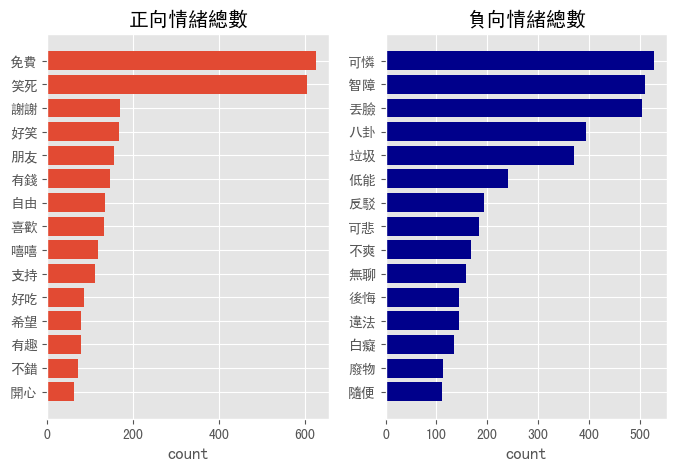

In [ ]:
p_sum = negative_article[negative_article["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = negative_article[negative_article["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

### 情緒關鍵字:正面情緒文章

In [ ]:
positive_article = (positive_article.merge(df_liwc, on='word')
                    .groupby(['word', 'sentiments'], as_index=False)
                    .size()
                    .sort_values('size', ascending = False))

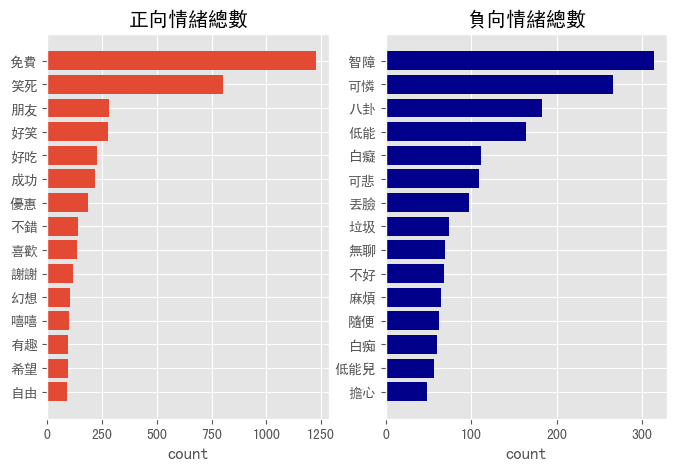

In [ ]:
p_sum = positive_article[positive_article["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = positive_article[positive_article["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

從正負面情緒圖觀察發現，正面和負面的關鍵字沒有甚麼顯著的差異，負面情緒較高的文章比較常出現「擔心」、「後悔」、「麻煩」等討論改名負面影響的字詞，比較著重在批評改名行為本身；正面情緒較高的文章出現較多的「免費」、「優惠」、「好玩」等字詞，著重在討論優惠本身。